In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

load the dataset into pandas dataframe

In [2]:
# mount drive and read csv file
dfads = pd.read_csv("/content/advertising.csv")
# shows the datatype
type(dfads)

pandas.core.frame.DataFrame

In [3]:
# displays the first 5 records of the dataset
dfads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# displays the shape of the dataframe
dfads.shape

# the dataframe has a shape of (200, 4), this implies that the dataframe is made up of 200 rows and 4 columns of data.

(200, 4)

In [5]:
# display information about the datatype of each column and null values
dfads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# checking for null values
dfads.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [7]:
# display basic statistics about the data
dfads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**2. correlation matrix**

a correlation matrix is a table showing correlation coeffiecients between variables

In [8]:
# compute the correlation matrix
# dfads.corr()
dfads.corr(numeric_only = True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

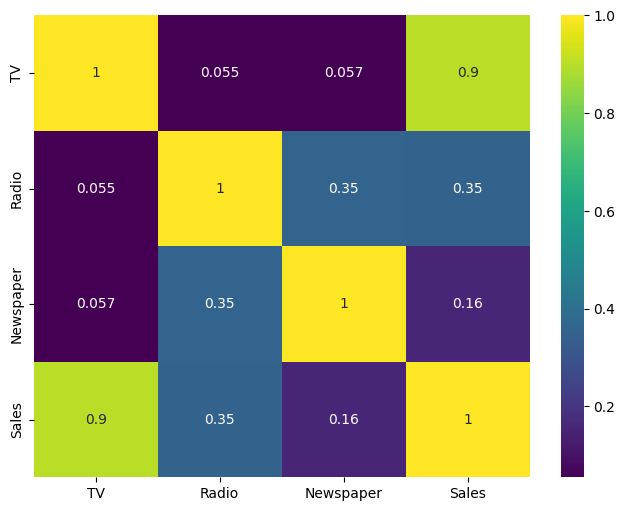

In [9]:
# display the correlation matrix using a heatmap
corr = dfads.corr(numeric_only = True)
fig, ax = plt.subplots(figsize = (8, 6))
# compute the correlation matrix and plot it
sns.heatmap(corr, annot=True, ax=ax, cmap = 'viridis')

**3 data visualization**

**1, pairplot**

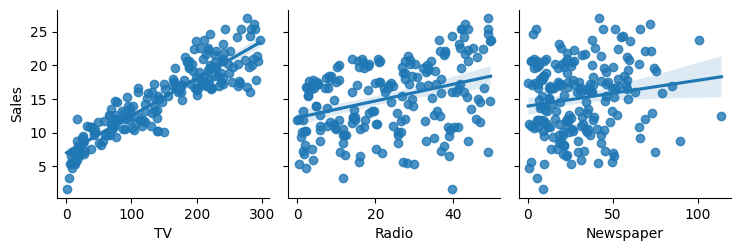

In [10]:
# scatter plots to check the linearity assumption between each independent variable (tv, radio, newspaper) and the dependent variable(sales)
sns.pairplot(dfads, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'reg', palette='pastel')
plt.show()

**2, scatterplot**

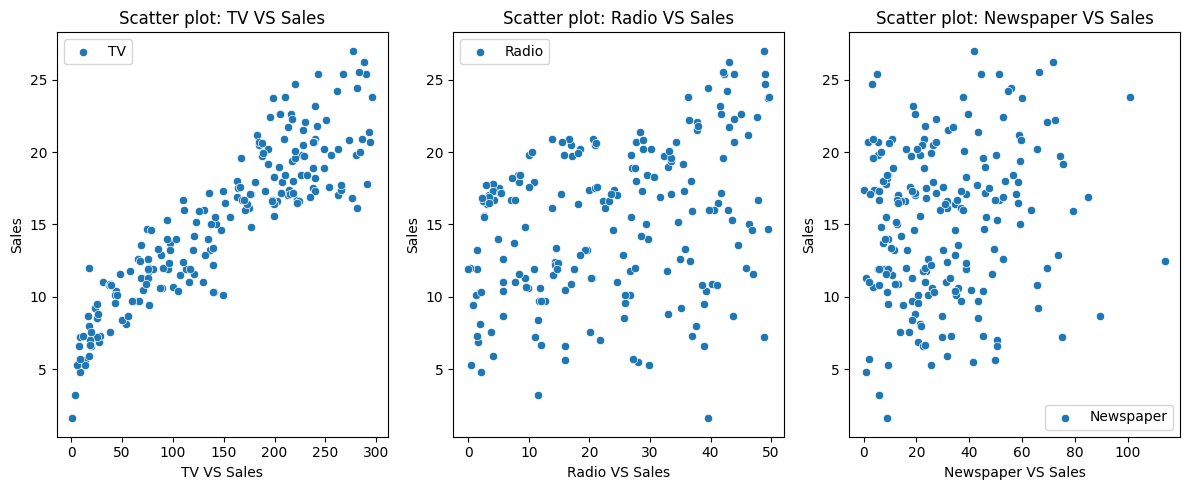

In [11]:
plt.figure(figsize = (12, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
  plt.subplot(1, 3, plot + 1)
  sns.scatterplot(x = dfads[col_name], y = dfads['Sales'], label = col_name, palette = "pastel")
  plt.xlabel("{} VS Sales".format(col_name))
  plt.title("Scatter plot: {} VS Sales".format(col_name))
  plt.legend()

plt.tight_layout()
plt.show()

**3, distplot(distribution plot)**

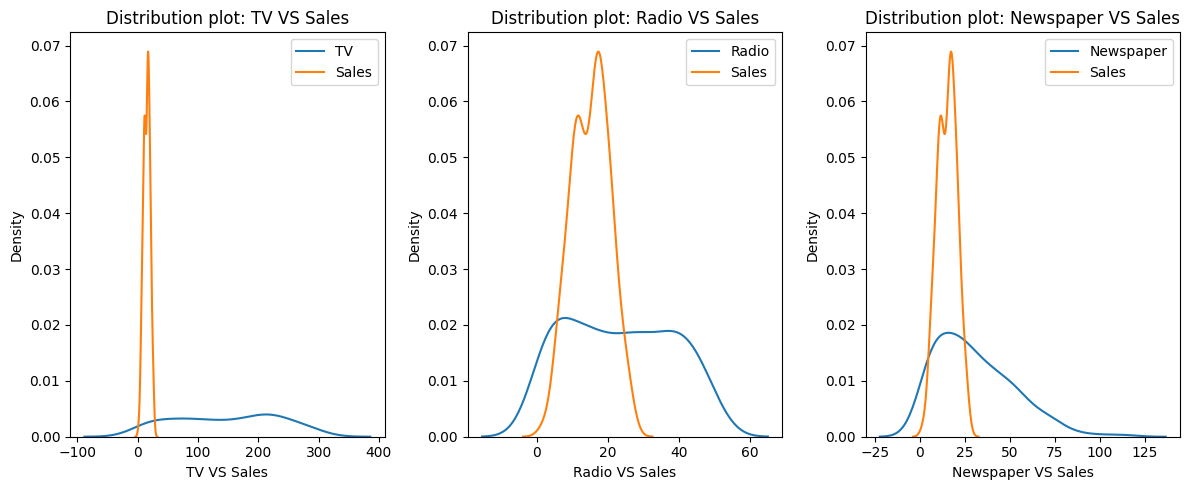

In [12]:
plt.figure(figsize = (12, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
  plt.subplot(1, 3, plot + 1)
  sns.distplot(x = dfads[col_name], hist = False, label = col_name)
  sns.distplot(x = dfads["Sales"], hist = False, label = "Sales")
  plt.xlabel("{} VS Sales".format(col_name))
  plt.title("Distribution plot: {} VS Sales".format(col_name))
  plt.legend()

plt.tight_layout()
plt.show()

**4, histoplot(histogram plot)**

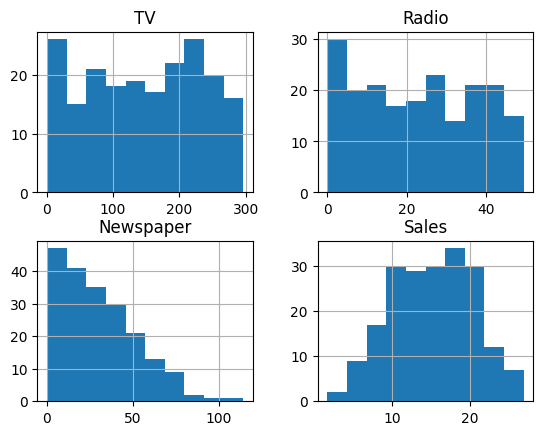

In [13]:
# histogram to check the normality assumption of the dependent variable (sales)
dfads.hist()
plt.show()

**5, linear regression plot**

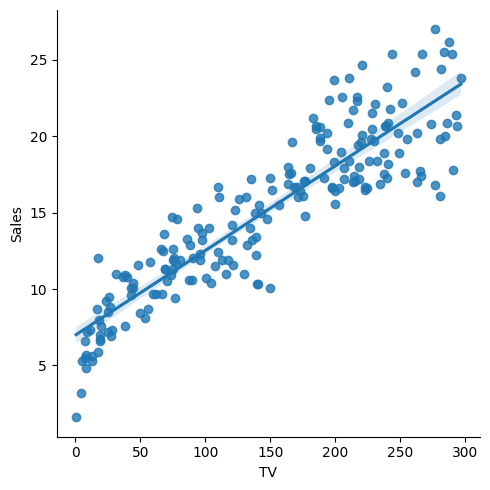

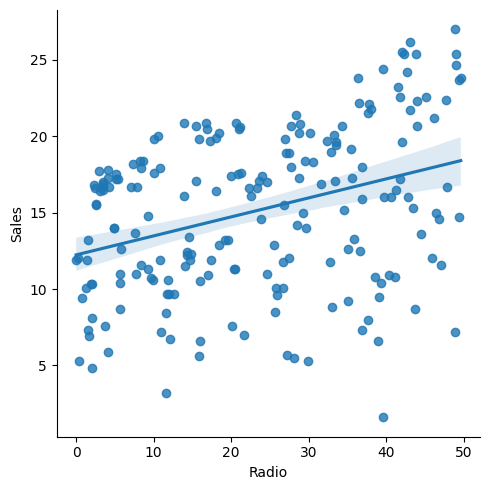

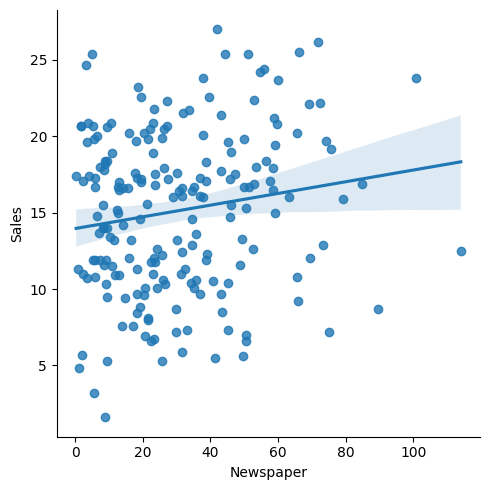

In [14]:
# linear regresion plots to visualize the relationship between each independent variable and the dependent variable
#plt.figure(figsize=(8, 5))

sns.lmplot(x='TV', y='Sales', data=dfads, height=5)
sns.lmplot(x='Radio', y='Sales', data=dfads, height=5)
sns.lmplot(x='Newspaper', y='Sales', data=dfads, height=5)

In [15]:
dfads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**4, preprocessing the dataset & model prediction**

In [16]:
# checking for null values
dfads.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [17]:
from sklearn.model_selection import train_test_split

x = dfads.drop('Sales', axis = 1)
y = dfads['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#with random_state=42, we get the same train and test sets across different executions
# the train and test sets directly affect the model's performance score
# random_state simply sets a seed to the random generator, so that your train splits are always deterministic


In [18]:
# lable encoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

lab = LabelEncoder()
y = lab.fit_transform(y)

In [20]:
# standardscaler() standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Data = scaler.fit_transform(x)
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)

#print metric to get performance
print("Accuracy (Linear Regression): ", model.score(x_test, y_test) * 100)

Accuracy (Linear Regression):  90.59011844150827


**Lineplot**

Linear Regression
Mean Squared Error: 2.9077569102710896
R2 Score: 0.9059011844150826
Cross-Validation Score: 0.8879742522131364


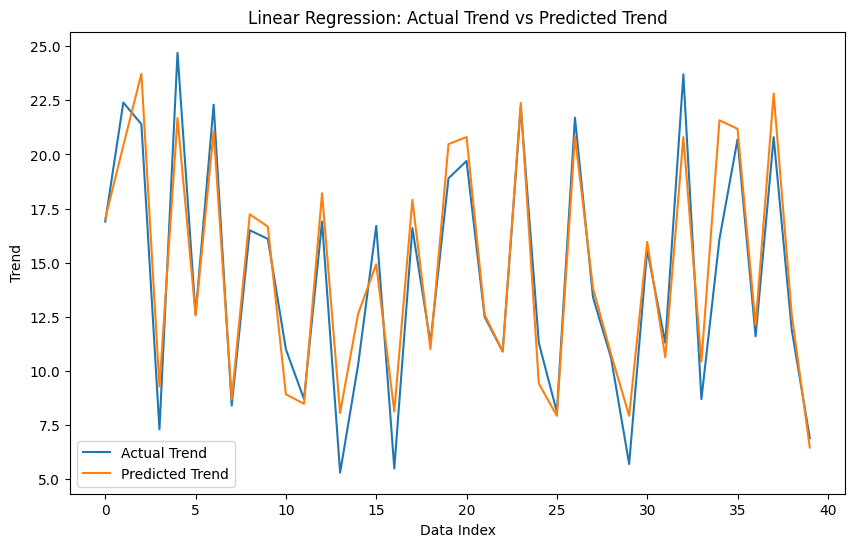

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# the performance of the model is evaluated using the following metrics:
# mean squared error (mse): a measure of the average squared differencde between predicted and actual sales values.
mse = mean_squared_error(y_test, y_pred)

# r-squared (r2) score: a measure of how well the model captures the variance in the target variable (sales).
r2 = r2_score(y_test, y_pred)

# cross-validation score: to ensure the model's generalization ability and minimize overfitting.
cv_scores = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'r2')

print("Linear Regression")
print("Mean Squared Error: {}".format(mse))
print("R2 Score: {}".format(r2))
print("Cross-Validation Score: {}".format(cv_scores.mean()))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label = 'Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label = 'Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title(f'Linear Regression: Actual Trend vs Predicted Trend')
plt.legend()
plt.show()
print()

**V. Prediction**

In [27]:
# make predictions on new data
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predcited_sales = model.predict(new_data)
print("Predicted Sales: ", predcited_sales)

Predicted Sales:  [15.32073778]
